In [1]:
import sys
import os
home = os.environ['HOME']
sys.path.append(home + '/projects/turbubox/tools/lib')
sys.path.append(home + '/projects/turbubox/tools')

import numpy as np
import pandas as pd
import glob
import cubicle
import turbubox.ulz as ulz
import turbubox.gausslobatto as lgl

import matplotlib
matplotlib.rcParams.update({'font.size': 9})

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
npoly = 7
ntype = 'gauss-lobatto'

In [3]:
xsDG,wsDG = lgl.LegendreGaussLobattoNodesAndWeights(npoly)

xsFV = ulz.mk_body_centered_linspace(-1,1,npoly+1)
temp = ulz.mk_body_centered_to_face_centered(xsFV)
wsFV = (np.roll(temp,-1)-temp)[:-1]

In [12]:
DG2FV = np.zeros((npoly+1,npoly+1))
xsFV_ = ulz.mk_body_centered_to_face_centered(xsFV)

for i in range(npoly+1):
    VV = lgl.mk_vandermonde_matrix(xsDG,ulz.transform_to_ref_space(xsFV_[i],xsFV_[i+1],xsDG))
    for j in range(npoly+1):
        for k in range(npoly+1):
            DG2FV[i,j] += wsDG[k] * VV[k,j]

DG2FV *= 0.5

FV2DG = np.linalg.inv(DG2FV)

In [21]:
DG2FV = np.diag(np.ones(npoly+1))
FV2DG = DG2FV
xsFV = xsDG
wsFV = wsDG

In [26]:
func = lambda x: 0.01 + np.abs(13*x+1)*10*np.exp(-x**2/0.05)
#func = lambda x: 5*(x+2)**2 - x
#xsEX = np.linspace(-1,1,npoly+1)
xsEX = xsDG

fsEX = func(xsEX)
fsDG = np.dot(lgl.mk_vandermonde_matrix(xsEX,xsDG),fsEX)
fsFV = np.dot(DG2FV,fsDG)

In [27]:
alpha = 0.345
fsHY = alpha * np.dot(FV2DG,fsFV) + (1-alpha)*fsDG

mass_DG = np.dot(wsDG,fsDG)
mass_FV = np.dot(wsFV,fsFV)
mass_HY = np.dot(wsDG,fsHY)

np.abs(mass_DG-mass_FV),np.abs(mass_DG-mass_HY)

(0.0, 0.0)

In [28]:
fsRC = np.dot(FV2DG,fsFV)

mass_DG = np.dot(wsDG,fsDG)
mass_FV = np.dot(wsFV,fsFV)
mass_RC = np.dot(wsDG,fsRC)

alpha = 0.345
fsHY = mass_DG + alpha * (fsRC - mass_RC) + (1-alpha)*(fsDG - mass_DG)

mass_HY = np.dot(wsDG,fsHY)
                          
np.abs(mass_DG-mass_FV),np.abs(mass_DG-mass_HY)

(0.0, 1.7763568394002505e-15)

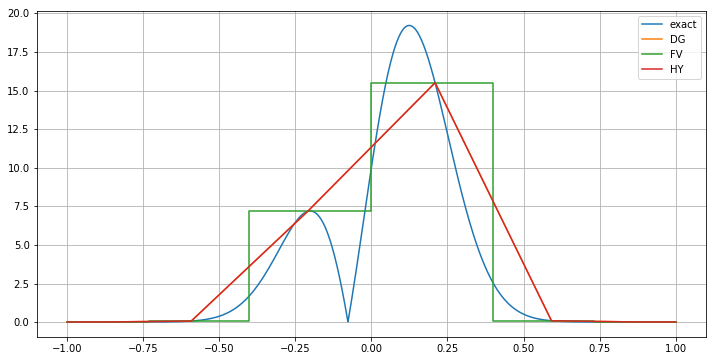

In [29]:
plt.figure(figsize=(12,6))
plt.grid()
#plt.ylim(-20,25)
xs_ = np.linspace(-1,1,1000)
fs_ = func(xs_)
plt.plot(xs_,fs_,label='exact')
plt.plot(xsDG,fsDG, label='DG')
plt.step(xsFV,fsFV,where='mid',label='FV')
plt.plot(xsDG,fsHY,label='HY')
plt.legend()

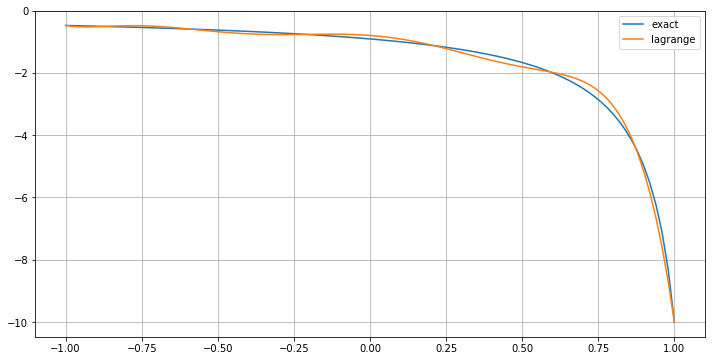

In [16]:
fun = lambda x: -1/np.abs(x-1.1)

plt.figure(figsize=(12,6))
plt.grid()

xs = np.linspace(-1,1,100)
ys = fun(xs)
plt.plot(xs,ys,label='exact')

VV = lgl.mk_vandermonde_matrix(lgl.mk_nodes(npoly,ntype=ntype),xs)

ys = np.dot(VV,fun(lgl.mk_nodes(npoly,ntype=ntype)))
plt.plot(xs,ys,label='lagrange')

plt.legend()

#plt.ylim(-10,0)